<img src="https://pjreddie.com/static/img/darknet.png" alt="Darknet" height="200">  <img src="https://pjreddie.com/media/image/yologo_2.png" alt="Darknet" height="80">

#◢ Darknet: Open Source Neural Networks in C (Yolo-v4) 

Darknet is an open source neural network framework written in C and CUDA. It is fast, easy to install, and supports CPU and GPU computation.

####**Credits:**

Big special thanks to:

**Joseph Redmon** [@pjreddie](https://www.github.com/pjreddie) for original Darknet(YOLOv4) version.

**Alexey** [@AlexeyAB](https://github.com/AlexeyAB) for modify Darknet(YOLOv4) version.

In [1]:
!apt update
#!apt upgrade -y
!uname -m && cat /etc/*release
!gcc --version
!uname -r

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-securi

In [2]:
!nvidia-smi

Fri Apr 23 20:45:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

To access Google Drive Folder and Files

In [26]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


**Original Version of Darknet**

In [4]:
%rm -r darknet
!git clone https://github.com/pjreddie/darknet
%cd darknet/

rm: cannot remove 'darknet': No such file or directory
Cloning into 'darknet'...
remote: Enumerating objects: 5934, done.
remote: Total 5934 (delta 0), reused 0 (delta 0), pack-reused 5934
Receiving objects: 100% (5934/5934), 6.35 MiB | 31.70 MiB/s, done.
Resolving deltas: 100% (3925/3925), done.
/content/darknet


**Modify Version of Darknet**

In [8]:
%rm -r darknet
!git clone https://github.com/AlexeyAB/darknet/
%cd darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 14978, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 14978 (delta 9), reused 22 (delta 7), pack-reused 14949
Receiving objects: 100% (14978/14978), 13.40 MiB | 25.04 MiB/s, done.
Resolving deltas: 100% (10172/10172), done.
/content/darknet


In [9]:
!apt install libopencv-dev python-opencv ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  python-opencv
0 upgraded, 1 newly installed, 0 to remove and 36 not upgraded.
Need to get 535 kB of archives.
After this operation, 2,944 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python-opencv amd64 3.2.0+dfsg-4ubuntu0.1 [535 kB]
Fetched 535 kB in 1s (930 kB/s)
Selecting previously unselected package python-opencv.
(Reading database ... 160690 files and directories currently installed.)
Preparing to unpack .../python-opencv_3.2.0+dfsg-4ubuntu0.1_amd64.deb ...
Unpacking python-opencv (3.2.0+dfsg-4ubuntu0.1) ...
Setting

## How to evaluate FPS of YOLOv4 on GPU
1. Compile Darknet with `GPU=1 CUDNN=1 CUDNN_HALF=1 OPENCV=1` in the `Makefile` (or use the same settings with Cmake)


In [12]:
%pycat Makefile

**Changing** the variables to include OpenCV and GPU in the Makefile

In [13]:
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile

%pycat Makefile

In [14]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

2. Download `yolov4.weights` file: https://drive.google.com/open?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT

In [31]:
#Download yolov4.weights file
%cp '../drive/My Drive/Colab Notebooks/Darknet/yolov4.weights' .

3. Get any .avi/.mp4 video file | image file (preferably not more than 1920x1080 to avoid bottlenecks in CPU performance)

In [32]:
#download Images
!wget -O data/spg1.jpg http://spg.nic.in/images/SPGslide4.jpg
!wget -O data/spg2.jpg http://spg.nic.in/images/SPGslide1.jpg
!wget -O data/spg3.jpg http://spg.nic.in/images/SPGslide3.jpg

--2021-04-23 21:19:30--  http://spg.nic.in/images/SPGslide4.jpg
Resolving spg.nic.in (spg.nic.in)... 164.100.163.225
Connecting to spg.nic.in (spg.nic.in)|164.100.163.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168780 (165K) [image/jpeg]
Saving to: ‘data/spg1.jpg’

data/spg1.jpg       100%[===================>] 164.82K   232KB/s    in 0.7s    

2021-04-23 21:19:31 (232 KB/s) - ‘data/spg1.jpg’ saved [168780/168780]

--2021-04-23 21:19:31--  http://spg.nic.in/images/SPGslide1.jpg
Resolving spg.nic.in (spg.nic.in)... 164.100.163.225
Connecting to spg.nic.in (spg.nic.in)|164.100.163.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110455 (108K) [image/jpeg]
Saving to: ‘data/spg2.jpg’

data/spg2.jpg       100%[===================>] 107.87K   152KB/s    in 0.7s    

2021-04-23 21:19:32 (152 KB/s) - ‘data/spg2.jpg’ saved [110455/110455]

--2021-04-23 21:19:32--  http://spg.nic.in/images/SPGslide3.jpg
Resolving spg.nic.in (spg.nic.in

Detect objects from Image

In [35]:
!./darknet detect cfg/yolov4.cfg yolov4.weights -thresh 0.25 data/spg3.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv   

In [36]:
from google.colab.patches import cv2_imshow
#!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('spg1_pre.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

AttributeError: ignored

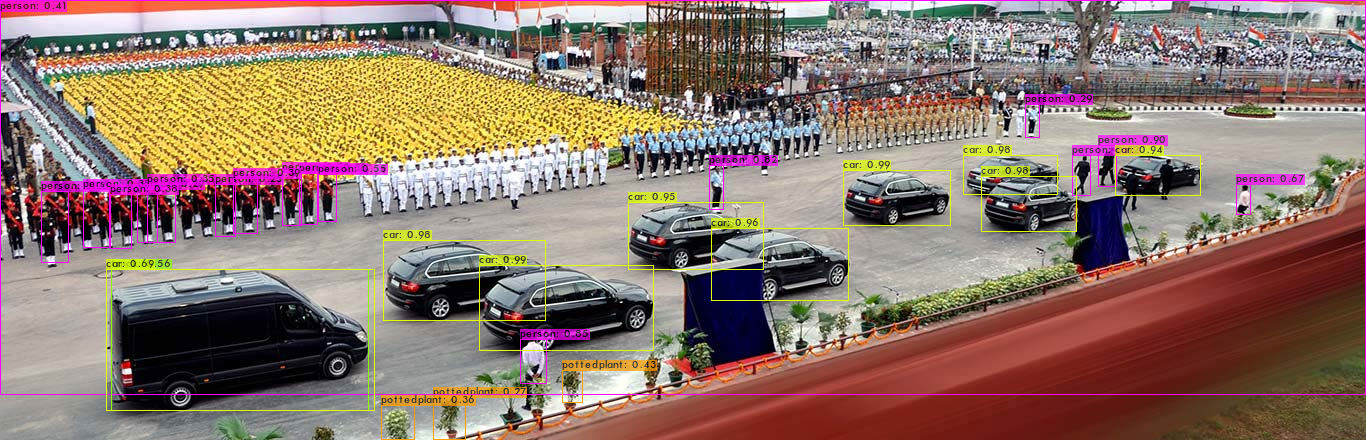

In [37]:
from google.colab.patches import cv2_imshow
#!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('predictions.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

Download video from Youtube | Copy video from Google Drive 

In [38]:
!pip install youtube-dl

     |████████████████████████████████| 1.9MB 19.9MB/s 


In [39]:
#download from Youtube
!youtube-dl -f 'bestvideo[height<=720]+bestaudio/best[height<=720]' -o '%(title)s.%(ext)s' --restrict-filenames https://www.youtube.com/watch?v=jjlBnrzSGjc

[youtube] jjlBnrzSGjc: Downloading webpage
[download] Destination: 4K_camera_example_for_Traffic_Monitoring_Road.f136.mp4
[download] 100% of 21.17MiB in 00:00
[download] Destination: 4K_camera_example_for_Traffic_Monitoring_Road.f140.m4a
[download] 100% of 1.34MiB in 00:00
[ffmpeg] Merging formats into "4K_camera_example_for_Traffic_Monitoring_Road.mp4"
Deleting original file 4K_camera_example_for_Traffic_Monitoring_Road.f136.mp4 (pass -k to keep)
Deleting original file 4K_camera_example_for_Traffic_Monitoring_Road.f140.m4a (pass -k to keep)


In [40]:
#copy video from Drive 
!cp '../drive/My Drive/Colab Notebooks/Darknet/4K_Traffic_camera.mp4' .

cp: cannot stat '../drive/My Drive/Colab Notebooks/Darknet/4K_Traffic_camera.mp4': No such file or directory


Detect objects from video

In [42]:
!./darknet detector demo cfg/coco.data cfg/yolov4.cfg yolov4.weights -thresh 0.20 -dont_show 4K_camera_example_for_Traffic_Monitoring_Road.mp4 -out_filename Traffic2_yolo4.mp4

Streaming output truncated to the last 5000 lines.
car: 98% 
car: 98% 
car: 98% 
car: 96% 
car: 95% 
car: 95% 
car: 95% 
car: 94% 
car: 93% 
car: 93% 
car: 85% 
car: 84% 
car: 82% 
car: 76% 
car: 59% 
car: 54% 
car: 46% 
car: 41% 
car: 22% 
person: 46% 
person: 30% 

FPS:23.4 	 AVG_FPS:26.9

 cvWriteFrame 
Objects:

traffic light: 33% 
bus: 81% , truck: 42% 
truck: 36% 
bus: 100% 
motorbike: 41% 
car: 99% 
car: 99% 
car: 99% 
car: 98% 
car: 98% 
car: 97% 
car: 97% 
car: 96% 
car: 96% 
car: 95% 
car: 93% 
car: 88% 
car: 87% 
car: 85% 
car: 76% 
car: 76% 
car: 57% 
car: 52% 
car: 40% 
car: 30% 
car: 27% 
car: 26% 
person: 53% 
person: 28% 

FPS:23.2 	 AVG_FPS:26.9

 cvWriteFrame 
Objects:

bus: 81% , truck: 47% 
truck: 34% 
truck: 24% 
bus: 100% 
motorbike: 21% 
car: 99% 
car: 99% 
car: 99% 
car: 98% 
car: 98% 
car: 98% 
car: 96% 
car: 96% 
car: 96% 
car: 95% 
car: 92% 
car: 91% 
car: 87% 
car: 86% 
car: 78% 
car: 65% 
car: 61% 
car: 50% 
car: 37% 
car: 36% 
car: 34% 
person: 77% 

FPS:2

##How to train (to detect your custom objects):


### Training Yolo v4 (and v3):
---

1.Create file `yolo-obj.cfg` with the same content as in `yolov4-custom.cfg` (or copy `yolov4-custom.cfg` to `yolo-obj.cfg`) and:

* change line batch to `batch=64`
* change line subdivisions to `subdivisions=16`
* change line max_batches to (`classes*2000` but not less than `4000`), f.e. `max_batches=6000` if you train for 3 classes
* change line steps to 80% and 90% of max_batches, f.e. `steps=4800,5400`
set network size `width=416 height=416` or any value multiple of 32: 
  * yolov3.cfg#L8-L9
* change line `classes=80` to your number of objects in each of 3 `[yolo]`-layers:
  * yolov3.cfg#L610
  * yolov3.cfg#L696
  * yolov3.cfg#L783
* change `[filters=255]` to filters=(classes + 5)x3 in the 3 `[convolutional]` before each `[yolo]` layer
  * yolov3.cfg#L603
  * yolov3.cfg#L689
  * yolov3.cfg#L776
* when using `[Gaussian_yolo]` layers, change `[filters=57]` filters=(classes + 9)x3 in the 3 `[convolutional]` before each `[Gaussian_yolo]` layer
  * Gaussian_yolov3_BDD.cfg#L604
  * Gaussian_yolov3_BDD.cfg#L696
  * Gaussian_yolov3_BDD.cfg#L789
  
So if classes=1 then should be filters=18. If classes=2 then write filters=21.

In [ ]:
#%cp cfg/yolov3.cfg cfg/yolo-obj.cfg
%cp cfg/yolov4-custom.cfg cfg/yolo-obj.cfg

#!sed -i 's/batch=1/batch=64/g' cfg/yolo-obj.cfg
#!sed -i 's/subdivisions=32/subdivisions=16/g' cfg/yolo-obj.cfg
!sed -i 's/width=608/width=416/g' cfg/yolo-obj.cfg
!sed -i 's/height=608/height=416/g' cfg/yolo-obj.cfg
!sed -i 's/max_batches = 500500/max_batches = 4000/g' cfg/yolo-obj.cfg
!sed -i 's/steps=400000,450000/steps=4800,5400/g' cfg/yolo-obj.cfg
!sed -i 's/classes=80/classes=1/g' cfg/yolo-obj.cfg
!sed -i 's/filters=256/filters=18/g' cfg/yolo-obj.cfg

In [ ]:
%pycat cfg/yolo-obj.cfg

2.Create file obj.names in the directory `build\darknet\x64\data\` with objects names - each in new line



In [ ]:
all_classes = """Firearm
"""

file = """text_file = open("build/darknet/x64/data/obj.names", "w");text_file.write(all_classes);text_file.close()""" 

exec(file)
%pycat build/darknet/x64/data/obj.names

3.Create file obj.data in the directory `build\darknet\x64\data\` containing (where classes = number of objects):

In [ ]:
obj_data = """classes= 1
train  = build/darknet/x64/data/train.txt
valid  = build/darknet/x64/data/valid.txt
names = build/darknet/x64/data/obj.names
backup = build/darknet/x64/backup/
"""

file = """text_file = open("build/darknet/x64/data/obj.data", "w");text_file.write(obj_data);text_file.close()""" 

exec(file)
%pycat build/darknet/x64/data/obj.data

4.Put image-files (.jpg) of your objects in the directory build/darknet/x64/data/obj/


In [ ]:
%ls '../drive/My Drive/Colab Notebooks/Darknet/'

In [ ]:
%mkdir build/darknet/x64/data/obj
%cp -r "../drive/My Drive/Colab Notebooks/Darknet/Guns/." build/darknet/x64/data/obj/

In [ ]:
#total number of files
%ls -1 build/darknet/x64/data/obj/ | wc -l

1386


In [ ]:
##total number of .jpg & .txt files
%ls -1 build/darknet/x64/data/obj/*.jpg | wc -l
%ls -1 build/darknet/x64/data/obj/*.txt | wc -l

693
693


5.You should label each object on images from your dataset. Use this visual GUI-software for marking bounded boxes of objects and generating annotation files for Yolo v2 & v3: 

---
**LabelImg**
  
LabelImg is a graphical image annotation tool.: 
https://github.com/tzutalin/labelImg


---

**Yolo_mark**

Windows & Linux GUI for marking bounded boxes of objects in images for training Yolo v3 and v2

https://github.com/AlexeyAB/Yolo_mark

It will create `.txt`-file for each `.jpg`-image-file - in the same directory and with the same name, but with `.txt`-extension, and put to file: object number and object coordinates on this image, for each object in new line: `<object-class> <x> <y> <width> <height>`

Where:


*   `<object-class>` - integer object number from 0 to (classes-1)
*   `<x_center> <y_center> <width> <height>` - float values relative to width and height of image, it can be equal from (0.0 to 1.0]
*   for example: `<x> = <absolute_x> / <image_width>` or `<height> = <absolute_height> / <image_height>`
*   atention: `<x_center> <y_center>` - are center of rectangle (are not top-left corner)


For example for img1.jpg you will be created img1.txt containing:


```
1 0.716797 0.395833 0.216406 0.147222
0 0.687109 0.379167 0.255469 0.158333
1 0.420312 0.395833 0.140625 0.166667
```



6.Create file train.txt and valid.txt in directory `build\darknet\x64\data\` with filenames of your images, each filename in new line, with path relative to darknet, for example containing:


In [ ]:
import os, fnmatch
import numpy as np

train_file = open("build/darknet/x64/data/train.txt", "w")
valid_file = open("build/darknet/x64/data/valid.txt", "w")
listOfFiles = os.listdir('build/darknet/x64/data/obj/')  
pattern = "*.jpg"  
for f_name in listOfFiles:  
  if fnmatch.fnmatch(f_name, pattern):
    if np.random.rand(1) < 0.8:
      train_file.write("build/darknet/x64/data/obj/"+f_name+"\n")
      #print ("data/obj/"+f_name)
    else:
      valid_file.write("build/darknet/x64/data/obj/"+f_name+"\n")  
      
train_file.close()
valid_file.close()

In [ ]:
#Count number of files 
!wc -l build/darknet/x64/data/train.txt
!wc -l build/darknet/x64/data/valid.txt

552 build/darknet/x64/data/train.txt
141 build/darknet/x64/data/valid.txt


In [ ]:
%pycat build/darknet/x64/data/valid.txt

7.Download pre-trained weights for the convolutional layers and put to the directory `build\darknet\x64` 

* for `yolov4.cfg`, `yolov4-custom.cfg` (162 MB): [yolov4.conv.137](https://drive.google.com/open?id=1JKF-bdIklxOOVy-2Cr5qdvjgGpmGfcbp)
* for `csresnext50-panet-spp.cfg` (133 MB): [csresnext50-panet-spp.conv.112](https://drive.google.com/file/d/16yMYCLQTY_oDlCIZPfn_sab6KD3zgzGq/view?usp=sharing)
* for `yolov3.cfg`, `yolov3-spp.cfg` (154 MB): [darknet53.conv.74](https://pjreddie.com/media/files/darknet53.conv.74)
* for `yolov3-tiny-prn.cfg` , `yolov3-tiny.cfg` (6 MB): [yolov3-tiny.conv.11](https://drive.google.com/file/d/18v36esoXCh-PsOKwyP2GWrpYDptDY8Zf/view?usp=sharing)
* for `enet-coco.cfg` (EfficientNetB0-Yolov3) (14 MB): [enetb0-coco.conv.132](https://drive.google.com/file/d/1uhh3D6RSn0ekgmsaTcl-ZW53WBaUDo6j/view?usp=sharing)

In [ ]:
%ls '../drive/My Drive/Colab Notebooks/Darknet/'

In [ ]:
#copy downloaded pre-trained weights (e.g. yolov4.conv.137)
%cp '../drive/My Drive/Colab Notebooks/Darknet/yolov4.conv.137' build/darknet/x64/
#%ls build/darknet/x64/

8.Start training by using the command line: `./darknet detector train data/obj.data yolo-obj.cfg yolov4.conv.137`

* (file `yolo-obj_last.weights` will be saved to the `build\darknet\x64\backup\` for each 100 iterations)
* (file `yolo-obj_xxxx.weights` will be saved to the `build\darknet\x64\backup\` for each 1000 iterations)
* (to disable Loss-Window use `./darknet detector train data/obj.data yolo-obj.cfg yolov4.conv.137 -dont_show`, if you train on computer without monitor like a cloud Amazon EC2)
* (to see the mAP & Loss-chart during training on remote server without GUI, use command `./darknet detector train data/obj.data yolo-obj.cfg yolov4.conv.137 -dont_show` -mjpeg_port 8090 -map then open URL `http://ip-address:8090` in Chrome/Firefox browser)

8.1. For training with mAP (mean average precisions) calculation for each 4 Epochs (set `valid=valid.txt` or `train.txt` in `obj.data` file) and run: .`/darknet detector train data/obj.data yolo-obj.cfg yolov4.conv.137 -map`



```
./darknet detector train build/darknet/x64/data/obj.data cfg/yolo-obj.cfg build/darknet/x64/darknet53.conv.74 -dont_show -map
```



In [ ]:
%cat build/darknet/x64/data/obj.data

classes= 1
train  = build/darknet/x64/data/train.txt
valid  = build/darknet/x64/data/valid.txt
names = build/darknet/x64/data/obj.names
backup = build/darknet/x64/backup/


In [ ]:
# To train on Linux use command:
!./darknet detector train build/darknet/x64/data/obj.data cfg/yolo-obj.cfg build/darknet/x64/yolov4.conv.137 -dont_show

In [ ]:
%ls build/darknet/x64/backup/*.weights

In [ ]:
# rename pre-trained weights file
%cp -r build/darknet/x64/backup/yolo-obj_last.weights build/darknet/x64/backup/yolo-obj_1300_0p95avg.weights

In [ ]:
# copy pre-trained weights files to google drive
%cp -r build/darknet/x64/backup/*.weights "/content/drive/My Drive/Colab Notebooks/Darknet/backup/"

In [ ]:
%ls '../drive/My Drive/Colab Notebooks/Darknet/backup/'

yolo-obj_1000.weights  yolo-obj_1350_0p95avg.weights


9.After training is complete - get result yolo-obj_final.weights from path `build/darknet/x64/backup/`


* After each 100 iterations you can stop and later start training from this point. For example, after 2000 iterations you can stop training, and later just copy yolo-obj_2000.weights from `build/darknet/x64/backup/` to `build/darknet/x64/ `and start training using: `./darknet detector train data/obj.data yolo-obj.cfg yolo-obj_2000.weights`
* Also you can get result earlier than all 45000 iterations.

**Note**: If during training you see nan values for avg (loss) field - then training goes wrong, but if nan is in some other lines - then training goes well.

**Note**: If you changed width= or height= in your cfg-file, then new width and height must be divisible by 32.

**Note**: After training use such command for detection: darknet.exe detector test data/obj.data yolo-obj.cfg yolo-obj_8000.weights

**Note**: if error Out of memory occurs then in .cfg-file you should increase subdivisions=16, 32 or 64: 
* yolov3.cfg#L4

In [ ]:
# copy pre-trained weights files from google drive
%cp -r  "/content/drive/My Drive/Colab Notebooks/Darknet/backup/." build/darknet/x64/
%ls build/darknet/x64/*.weights

build/darknet/x64/yolo-obj_1000.weights
build/darknet/x64/yolo-obj_1350_0p95avg.weights
build/darknet/x64/yolo-obj_2000_0p65avg.weights


In [ ]:
# resuming training from the previous point
!./darknet detector train build/darknet/x64/data/obj.data cfg/yolo-obj.cfg build/darknet/x64/yolo-obj_1350_0p95avg.weights -dont_show

In [ ]:
%rm -r build/darknet/x64/yolo-obj_last.weights

In [ ]:
# # rename pre-trained weights file 
%mv -r build/darknet/x64/backup/yolo-obj_last.weights build/darknet/x64/backup/yolo-obj_1300_0p95avg.weights

In [ ]:
# copy pre-trained weights files to google drive
%cp -r build/darknet/x64/backup/yolo-obj_2000_0p65avg.weights "/content/drive/My Drive/Colab Notebooks/Darknet/backup/"

In [ ]:
!ls -a "/content/drive/My Drive/Colab Notebooks/Darknet/backup/"

### **Custom object detection:**
---
Example of Firearms detection:

**Image : **

```
./darknet detector test build/darknet/x64/data/obj.data cfg/yolo-obj.cfg build/darknet/x64/guns_1000it.weights -thresh 0.20 data/ak47.jpg
```


**Video : **

```
./darknet detector demo build/darknet/x64/data/obj.data cfg/yolo-obj.cfg build/darknet/x64/guns_1000it.weights -thresh 0.20 -dont_show Guns.mp4 -out_filename Guns_output.mp4
```



#### Firearms detection on Images 

In [ ]:
#download Images
!wget -O data/firearms1.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/US_Navy_100714-N-4965F-174_Chief_Mass_Communication_Specialist_Paula_Ludwick%2C_assigned_to_Fleet_Combat_Camera_Group_Pacific%2C_shoots_at_a_target_during_a_Navy_Rifle_Qualification_Course.jpg/1200px-thumbnail.jpg
!wget -O data/firearms2.jpg https://cdn.dvidshub.net/media/thumbs/photos/1201/514703/1000w_q95.jpg
!wget -O data/spg1.jpg http://spg.nic.in/images/SPGslide1.jpg

In [ ]:
%cat build/darknet/x64/data/obj.data

In [ ]:
!./darknet detector test build/darknet/x64/data/obj.data cfg/yolo-obj.cfg build/darknet/x64/yolo-obj_2000_0p65avg.weights -thresh 0.20 data/firearms3.jpg

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('predictions.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
!./darknet detector test build/darknet/x64/data/obj.data cfg/yolo-obj.cfg build/darknet/x64/yolo-obj_2000_0p65avg.weights -thresh 0.15 data/firearms2.jpg

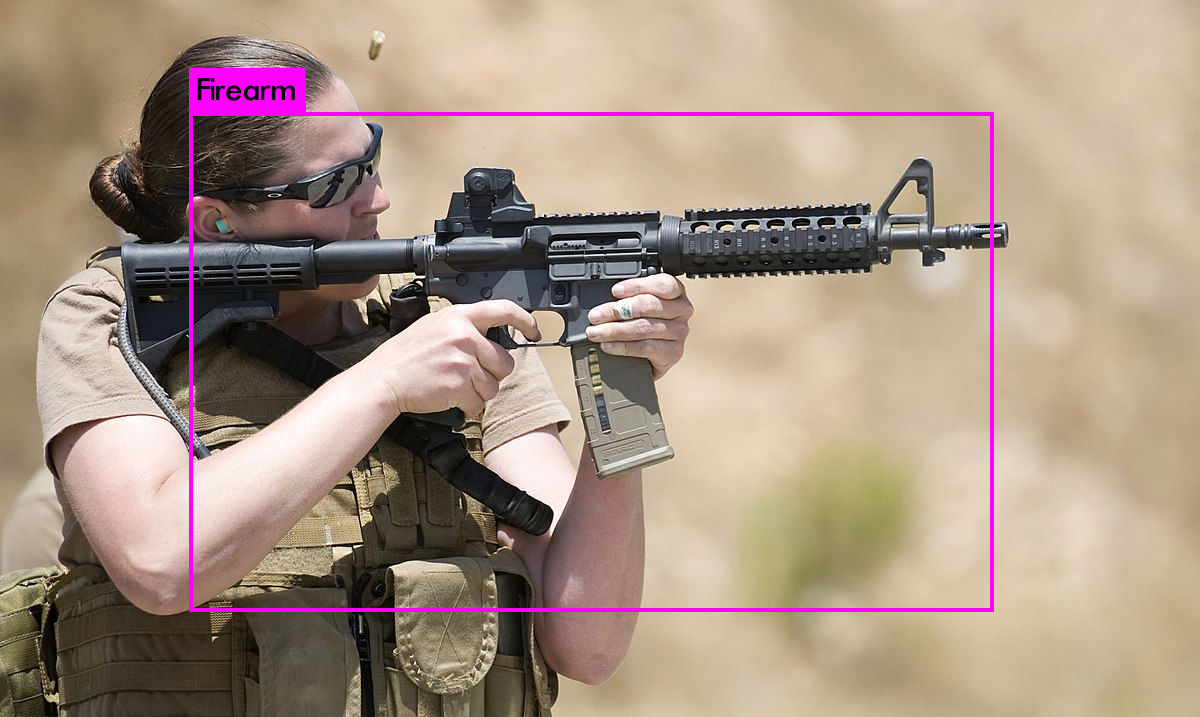

In [ ]:
img = cv2.imread('predictions.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
!./darknet detector test build/darknet/x64/data/obj.data cfg/yolo-obj.cfg build/darknet/x64/yolo-obj_2000_0p65avg.weights -thresh 0.20 data/spg1.jpg

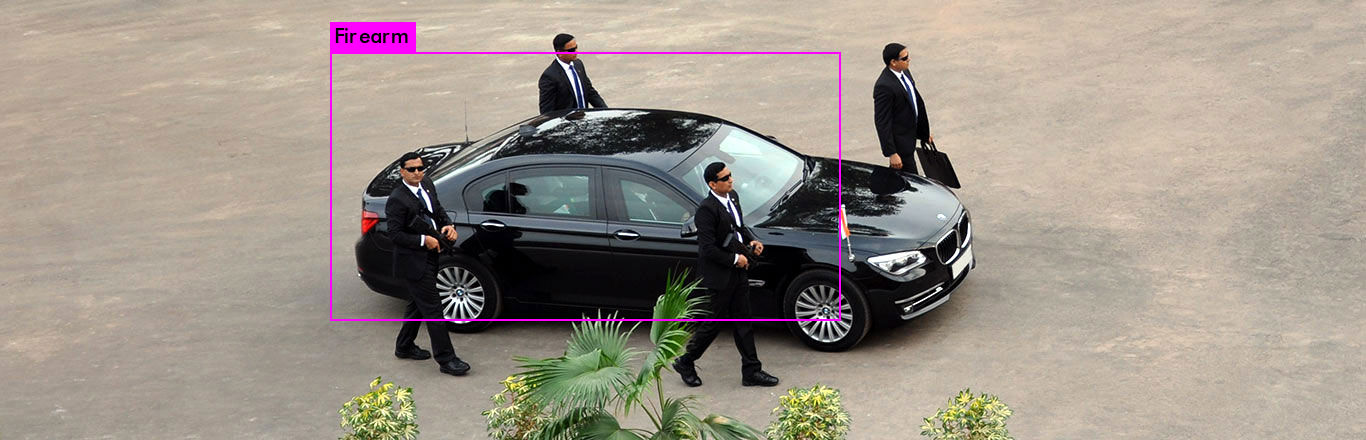

In [ ]:
img = cv2.imread('predictions.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

####  Firearms detection on Video

In [ ]:
#download video from Youtube (!pip install youtube-dl)
!youtube-dl -f 'bestvideo[height<=720]+bestaudio/best[height<=720]' -o '%(title)s.%(ext)s' --restrict-filenames https://www.youtube.com/watch?v=b6VRDcnziQU

In [ ]:
!./darknet detector demo build/darknet/x64/data/obj.data cfg/yolo-obj.cfg build/darknet/x64/yolo-obj_2000_0p65avg.weights -thresh 0.20 -dont_show Handgun.mkv -out_filename Handgun_yolo4.mkv

In [ ]:
%ls -lh *.mkv

## **Video Link**

YouTube link: https://youtu.be/XgvDXT0fme4

In [ ]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/XgvDXT0fme4" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## Extra Tutorial

**Playing videos on google colab**

In [ ]:
import io
import base64
from IPython.display import HTML
video = io.open('firearms_yolo4.mkv', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''.format(encoded.decode('ascii')))

**Showing Image**

In [ ]:
from google.colab.patches import cv2_imshow
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

Copy data from google colab to google drive

In [ ]:
!cp -r Handgun_yolo4.mkv "/content/drive/My Drive/Colab Notebooks/Darknet/"

Downloading the data from the colab

In [ ]:
from google.colab import files
files.download('build/darknet/x64/yolo-obj_1500up_05avgLoss.weights')

Copying data from google drive to google colab

In [ ]:
%cp -r "/content/drive/My Drive/Colab Notebooks/darknet/yolo-obj_1500up_05avgLoss.weights" build/darknet/x64/
%cp -r "/content/drive/My Drive/GColab/Guns.mp4" .